# PD 3

## Klasycznie biblioteczki i dane

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('./../../clustering_R3.csv')

## Wstępny ogląd na zbiór

In [14]:
data.head()

,X1,X2,X3
0,152.077986,197.910402,1.095707
1,145.520487,202.128032,2.738826
2,155.441273,198.122696,0.640457
3,150.389105,206.808383,0.686486
4,149.863221,205.417527,3.555814


In [15]:
import plotly.express as px

In [22]:
fig = px.scatter_3d(data, x='X1', y='X2', z='X3')
fig.show()

Taki interaktywny wykres, pozwala nam łatwo ocenić, że na oko klastrów powinno być 4.

## Metody

### Agglomerative ward

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [52]:
model = AgglomerativeClustering(n_clusters = 4)
labels = model.fit_predict(data)

In [53]:
fig = px.scatter_3d(data, x='X1', y='X2', z='X3', color = labels)
fig.show()

I rzeczywiście dla 4 klastrów prezentuje się to zgodnie z oczekiwaniami. Zobaczmy co podpowiedzą nam...

### Indeks Calińskiego-Harabasza

In [54]:
from sklearn.metrics import calinski_harabasz_score

In [71]:
n_clusters_check = list(range(2, 15))
scores = []
for n_c in n_clusters_check:
    model = AgglomerativeClustering(n_clusters = n_c)
    labels = model.fit_predict(data)
    scores.append(calinski_harabasz_score(data, labels))

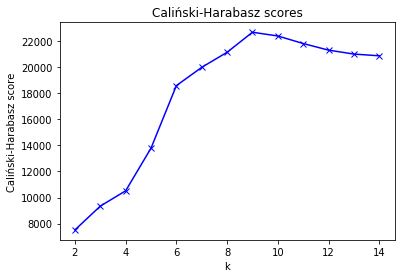

In [72]:
plt.plot(n_clusters_check, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Caliński-Harabasz score')
plt.title('Caliński-Harabasz scores')
plt.show()

Wynik tego indeksu jest wyższy gdy klastry są gęste i 'dobrze' rozdzielone. Podpowiada nam aby użyć 9 klastrów.

In [73]:
model = AgglomerativeClustering(n_clusters = 9)
labels = model.fit_predict(data)
fig = px.scatter_3d(data, x='X1', y='X2', z='X3', color = labels)
fig.show()

Podział na pewno nie jest pozbawiony sensu. Widać regułę według jakiej przyporządkowujemy klastry. Tak naprawdę wszystko zależy od rodzaju zbioru z jakim mamy do czynienia. Tutaj mamy 'sucho' podane współrzędne punktów, i na dobrą sprawę możemy dzielić je sobie w sposób dość dowolny.

### Indeks Daviesa-Bouldina

In [74]:
from sklearn.metrics import davies_bouldin_score

In [81]:
n_clusters_check = list(range(2, 15))
scores = []
for n_c in n_clusters_check:
    model = AgglomerativeClustering(n_clusters = n_c)
    labels = model.fit_predict(data)
    scores.append(davies_bouldin_score(data, labels))

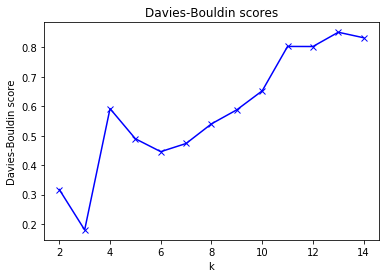

In [82]:
plt.plot(n_clusters_check, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores')
plt.show()

W tym wypadku otrzymujemy wyraźny skok przy 4, ale tę wizualizację już znamy. Wadą tej metryki na pierwszy rzut oka, wydaje się być, że wiecznie rośnie. Jednak kiedy zwiększymy dozwoloną liczbę klastrów, zauważymy, że hamuje a najwyższy punkt jest dla 26

In [83]:
n_clusters_check = list(range(2, 100))
scores = []
for n_c in n_clusters_check:
    model = AgglomerativeClustering(n_clusters = n_c)
    labels = model.fit_predict(data)
    scores.append(davies_bouldin_score(data, labels))

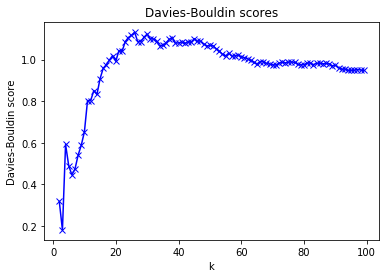

In [85]:
plt.plot(n_clusters_check, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores')
plt.show()

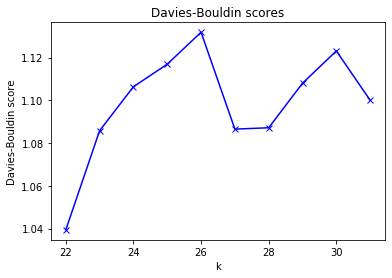

In [87]:
plt.plot(n_clusters_check[20:30], scores[20:30], 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores')
plt.show()

In [89]:
model = AgglomerativeClustering(n_clusters = 26)
labels = model.fit_predict(data)
fig = px.scatter_3d(data, x='X1', y='X2', z='X3', color = labels)
fig.show()

Ten podział, wydaje mi się już lekko przesadzony i absurdalny.

## Birch

In [94]:
from sklearn.cluster import Birch

In [95]:
model = Birch(n_clusters=4)
labels = model.fit_predict(data)

In [96]:
fig = px.scatter_3d(data, x='X1', y='X2', z='X3', color = labels)
fig.show()

Identycznie jak Agglomerative

### Indeks Calińskiego-Harabasza

In [98]:
n_clusters_check = list(range(2, 15))
scores = []
for n_c in n_clusters_check:
    model = Birch(n_clusters = n_c)
    labels = model.fit_predict(data)
    scores.append(calinski_harabasz_score(data, labels))

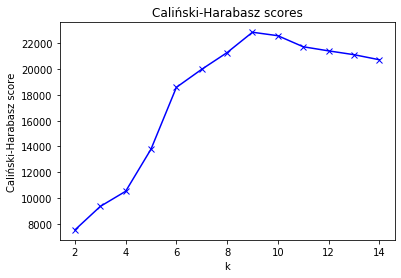

In [100]:
plt.plot(n_clusters_check, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Caliński-Harabasz score')
plt.title('Caliński-Harabasz scores')
plt.show()

Tak samo dla 9

In [103]:
model = Birch(n_clusters = 9)
labels = model.fit_predict(data)
fig = px.scatter_3d(data, x='X1', y='X2', z='X3', color = labels)
fig.show()

I taki sam podział

### Indeks Daviesa-Bouldina

In [104]:
n_clusters_check = list(range(2, 15))
scores = []
for n_c in n_clusters_check:
    model = AgglomerativeClustering(n_clusters = n_c)
    labels = model.fit_predict(data)
    scores.append(davies_bouldin_score(data, labels))

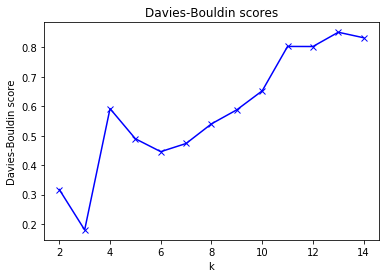

In [106]:
plt.plot(n_clusters_check, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores')
plt.show()

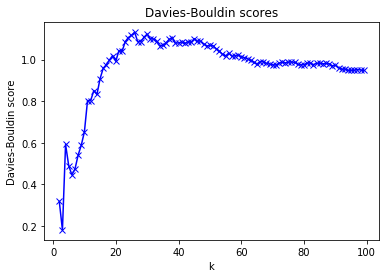

In [107]:
n_clusters_check = list(range(2, 100))
scores = []
for n_c in n_clusters_check:
    model = AgglomerativeClustering(n_clusters = n_c)
    labels = model.fit_predict(data)
    scores.append(davies_bouldin_score(data, labels))
    
plt.plot(n_clusters_check, scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores')
plt.show()

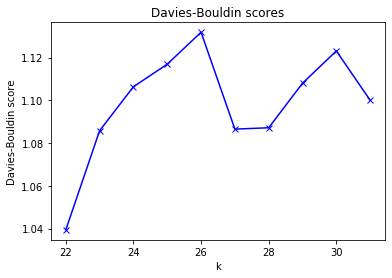

In [109]:
plt.plot(n_clusters_check[20:30], scores[20:30], 'bx-')
plt.xlabel('k')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin scores')
plt.show()

In [111]:
model = Birch(n_clusters = 26)
labels = model.fit_predict(data)
fig = px.scatter_3d(data, x='X1', y='X2', z='X3', color = labels)
fig.show()

Dokładnie ta sama sytuacja co poprzednio. Testy na 'Birch' nie wniosły tu nic twórczego

## Wnioski

Poznałem dwie nowe metryki oceny ilości klastrów. Ciekawe jest to, że żadna z nich nie faworyzowała ilości nasuwającej się intuicyjnie po spojrzeniu na wizualizację. Zdaje się jednak, że Indeks Daviesa-Bouldina dąży trochę do zbyt drobnych podziałów w celu optymalizacji zagęszczenia. Indeks Calińskiego-Harabasza wydaje się wprowadzać bardziej realne podziały, ale wciąż wymaga to przeprowadzenia większej ilości testów, zanim użyję jakiegoś silnego stwierdzenia.